In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [2]:
print(f"CV: {cv2.__version__}")
print(f"tess: {pytesseract.__version__}")

CV: 4.8.1
tess: 0.3.10


Leitura de Imagem

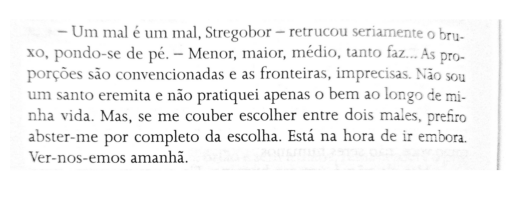

In [3]:
img = cv2.imread("imagens/trecho_livro.png")

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(rgb);

In [4]:
config_tesseract = "--tessdata-dir .tessdata --psm 6"
texto = pytesseract.image_to_string(rgb, lang="por", config=config_tesseract)

print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... Às pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. |
Ver-nos-emos amanhã. |



## Agora com uma placa

In [5]:
imgPath = "imagens/placa_carro1.png"

img = cv2.imread(imgPath)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(imgGray, lang="por", config=config_tesseract)
print(texto)

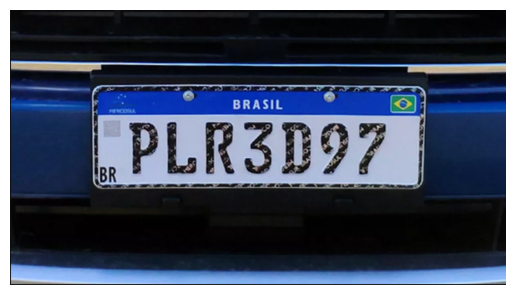

In [6]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

### Limiarização Simples

Texto: 


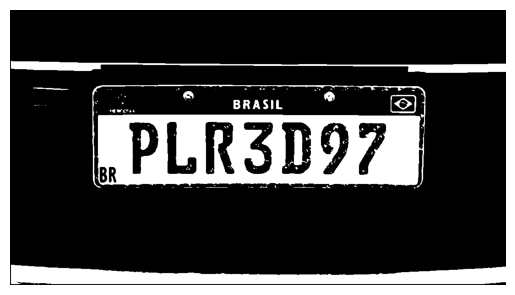

In [7]:
threshold = 140

valor, thresh = cv2.threshold(imgGray, threshold, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(thresh, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(thresh, lang="por", config=config_tesseract)
print(f"Texto: {texto}")



### Limirização Adaptativa

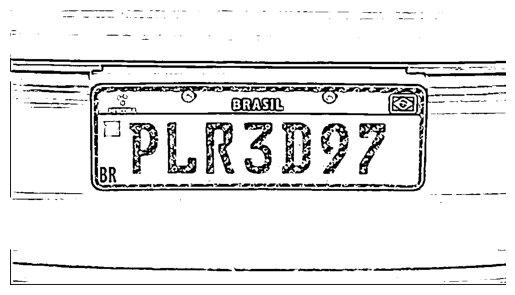

In [8]:
thresh_adapt = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
plt.axis('off')
plt.imshow(thresh_adapt, cmap='gray');

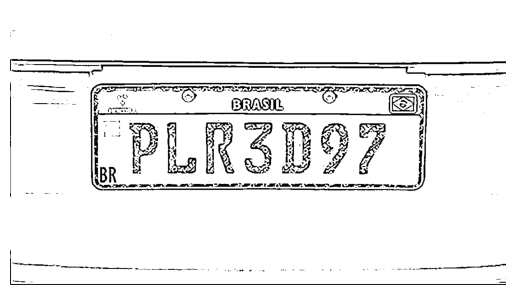

In [9]:
thresh_adapt = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.axis('off')
plt.imshow(thresh_adapt, cmap='gray');

In [10]:
config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(thresh_adapt, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: 


In [11]:
imgGray

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 124, 123, 123],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

### Limiarização de Otsu

103.0
Texto: 


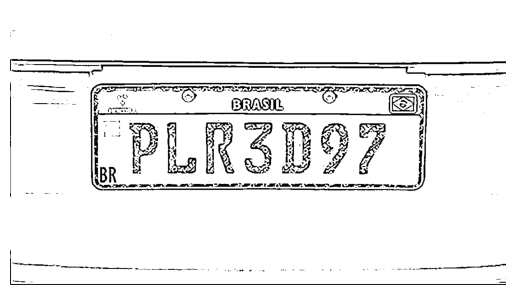

In [12]:
valor, thresh_otsu = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(thresh_otsu, cmap='gray');
print(valor)

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(thresh_otsu, lang="por", config=config_tesseract)
print(f"Texto: {texto}")



cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.axis('off')
plt.imshow(thresh_adapt, cmap='gray');

## Transformações Morfológicas - Erosão e Dilatação

Texto: m——A —— — —— —  —=- T

_____ BRASIL

PLR3D97



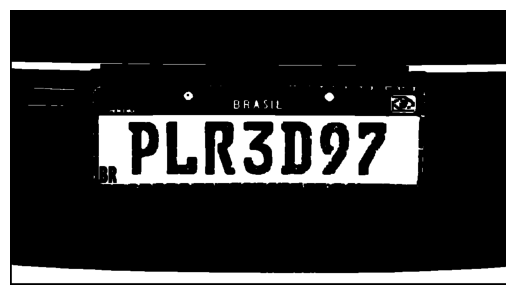

In [31]:
#erosão
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))

erode = cv2.erode(src=thresh_otsu, kernel=k)

plt.axis('off')
plt.imshow(erode, cmap='gray');


config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(erode, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: 


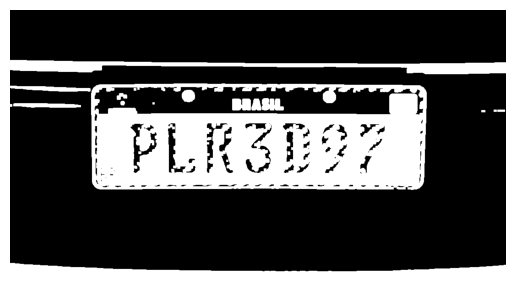

In [14]:
#dilatação
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))

dilate = cv2.dilate(src=thresh_otsu, kernel=k)

plt.axis('off')
plt.imshow(dilate, cmap='gray');


config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(dilate, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

### Abertura & Fechamento

Texto: PLR3D97

R o c AAAA




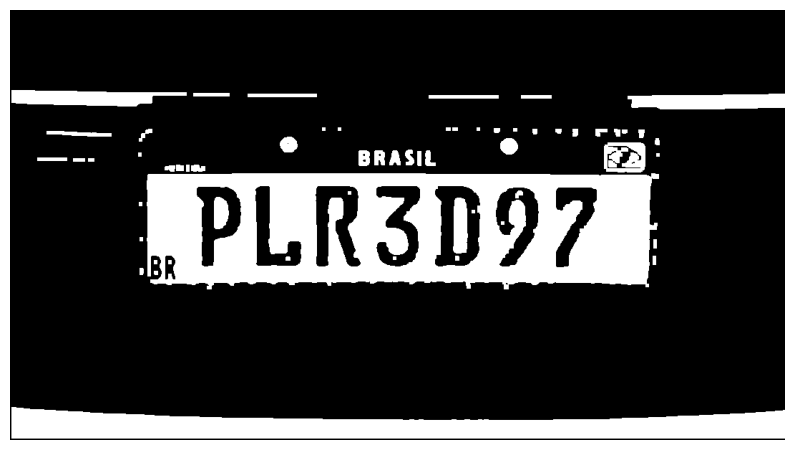

In [15]:
# abertura
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
opening = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(opening, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(opening, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: 


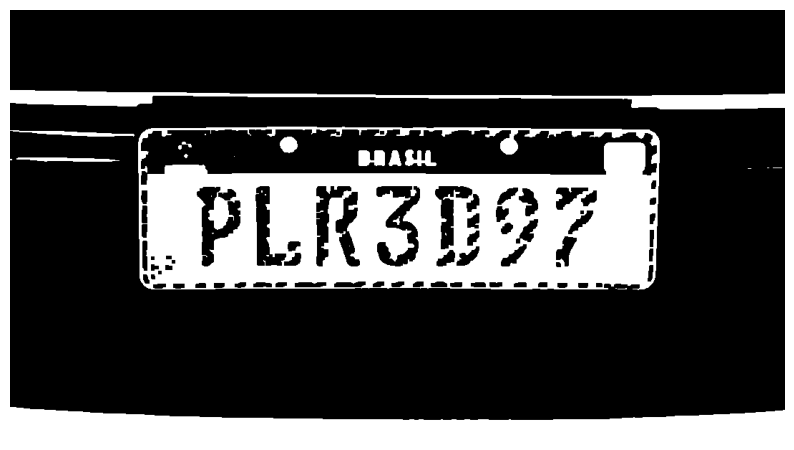

In [16]:
# fechamento
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
closing = cv2.morphologyEx(thresh_otsu, cv2.MORPH_CLOSE, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(closing, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(closing, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

## Outras Trasnformações

Texto: 


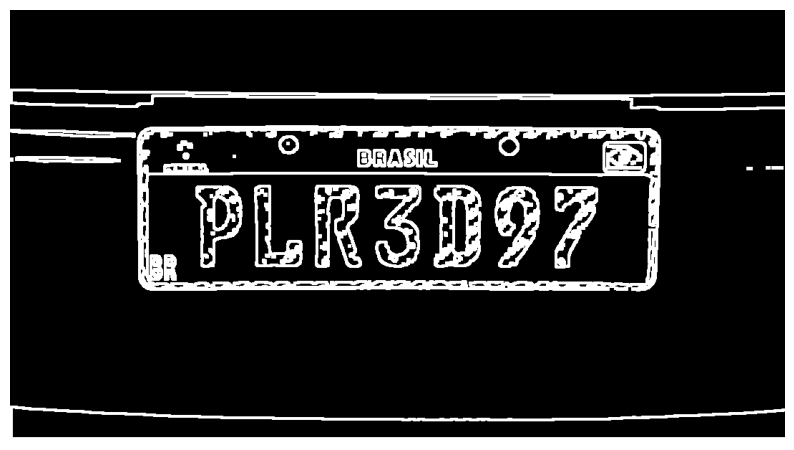

In [20]:
# gradiente morfológico
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
gradiente = cv2.morphologyEx(thresh_otsu, cv2.MORPH_GRADIENT, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(gradiente, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(gradiente, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: 


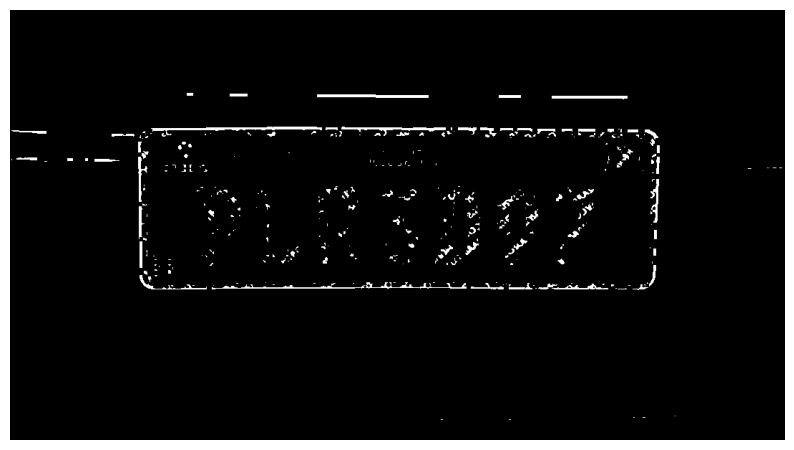

In [21]:
# cartola
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
cartola = cv2.morphologyEx(thresh_otsu, cv2.MORPH_TOPHAT, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: 


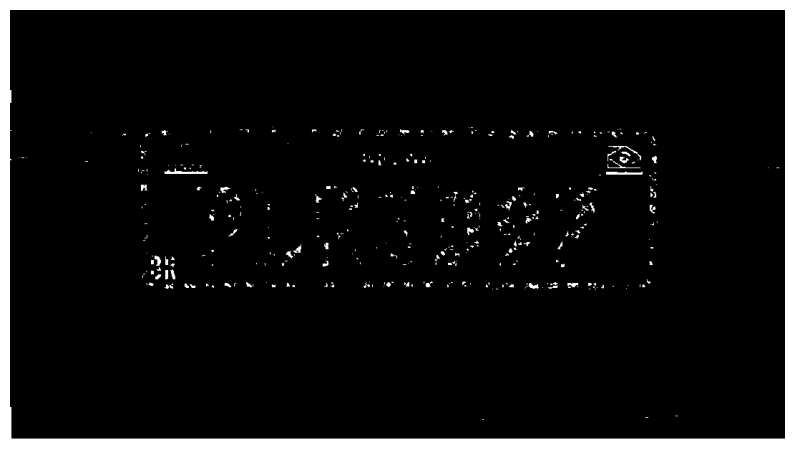

In [22]:
# blackhat
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
blackhat = cv2.morphologyEx(thresh_otsu, cv2.MORPH_BLACKHAT, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(blackhat, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(blackhat, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: BRASIL

):. ']Lllªlvªl—ª




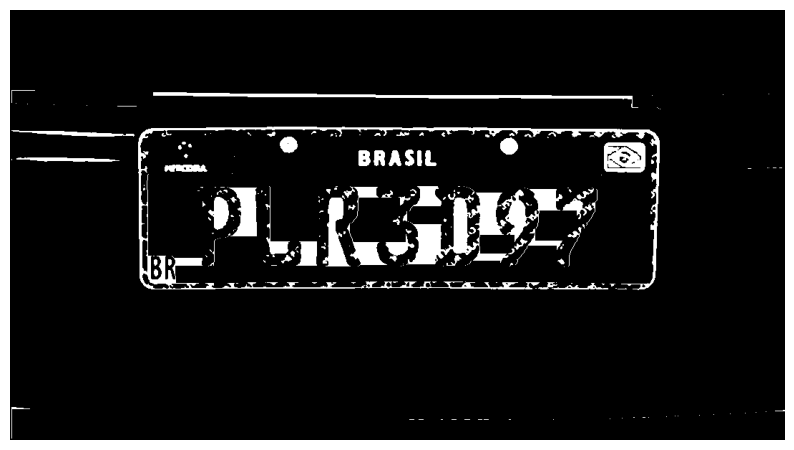

In [23]:
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(thresh_otsu, cv2.MORPH_TOPHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")


Texto: 


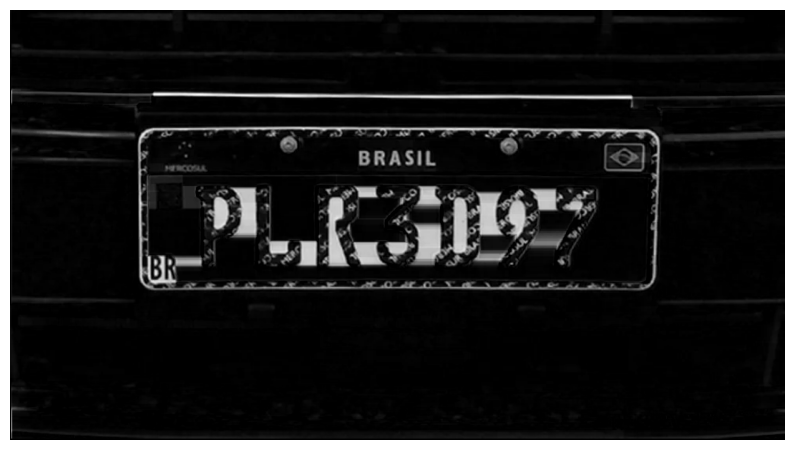

In [24]:
# usando escala de cinza
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(imgGray, cv2.MORPH_TOPHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: ' Éêi

L
a _'í'“áf_f* S EELO

%

l

dAiLHL

LRSD97

J

ler

——— —— — —— —

TE A S TA A A A a P4




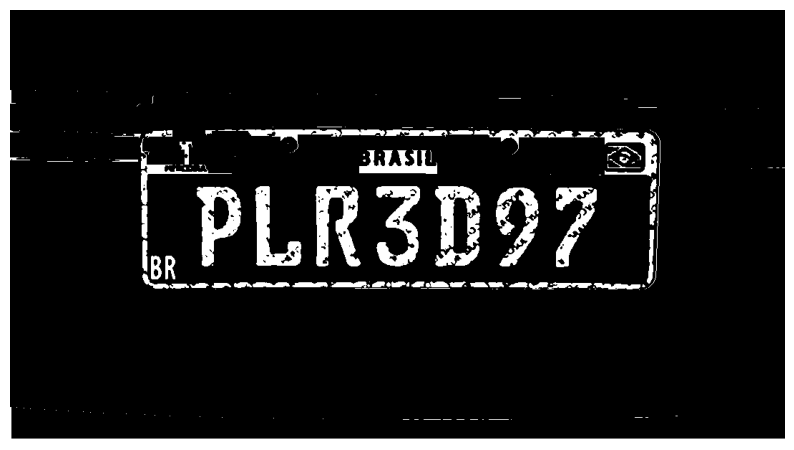

In [27]:
# usando escala de cinza
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(thresh_otsu, cv2.MORPH_BLACKHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

Texto: 


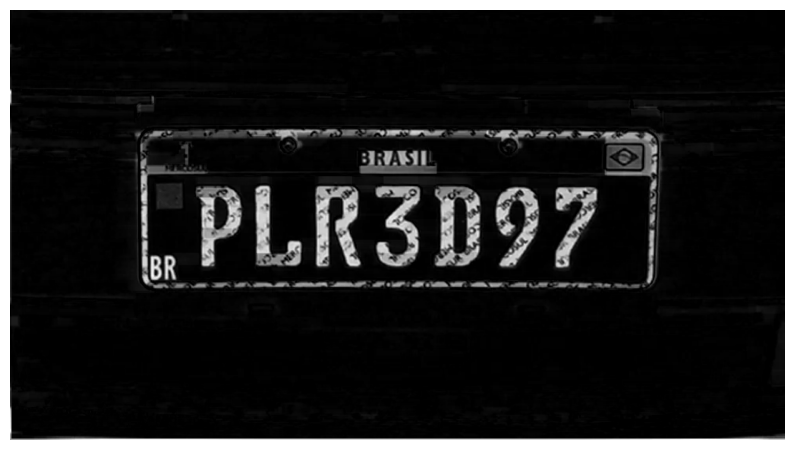

In [29]:
# usando escala de cinza
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(imgGray, cv2.MORPH_BLACKHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata --psm 6"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")